<a href="https://colab.research.google.com/github/kushasupaya/cof_featurization_ml/blob/main/COF_Project_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
import matplotlib.pyplot as plt

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("features_5000.csv")
X = data.drop(data.columns[[0]], axis =1 )
X.head()

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,rdf [19.00000 - 19.10000]A,rdf [19.10000 - 19.20000]A,rdf [19.20000 - 19.30000]A,rdf [19.30000 - 19.40000]A,rdf [19.40000 - 19.50000]A,rdf [19.50000 - 19.60000]A,rdf [19.60000 - 19.70000]A,rdf [19.70000 - 19.80000]A,rdf [19.80000 - 19.90000]A,rdf [19.90000 - 20.00000]A
0,1.0,8.0,7.0,4.556962,2.341291,6.0,77.0,92.0,15.0,82.949367,...,1226.427439,1328.947710,1349.889525,1384.966914,1355.091328,1181.471244,1392.827359,1361.552711,1333.674810,1231.528709
1,1.0,8.0,7.0,4.527778,2.547840,6.0,77.0,92.0,15.0,84.083333,...,2658.540982,2532.814052,2569.867883,2578.948510,2487.065301,2716.429690,2301.459462,3190.525080,2842.553965,2613.627179
2,1.0,8.0,7.0,5.093750,2.302734,6.0,77.0,92.0,15.0,83.718750,...,2071.560406,2292.252430,2151.810790,2582.791857,2056.367362,2553.600794,2520.868499,2401.061149,2132.432505,2256.736200
3,1.0,8.0,7.0,4.075000,2.613750,6.0,77.0,92.0,15.0,84.375000,...,1001.054614,971.570272,929.908908,909.952924,959.198360,929.094099,912.545783,962.743612,875.300451,990.511539
4,1.0,8.0,7.0,4.075000,2.613750,6.0,77.0,92.0,15.0,84.375000,...,2886.491788,2589.175200,2590.019416,2891.145332,2907.605363,2881.532216,2881.302190,3027.292945,2777.918877,2756.249572


In [3]:
all_prop = pd.read_csv(r'properties_5000_cofs.csv')

#  saving the target properties in Y.
# y = all_prop[[' deliverable capacity [v STP/v]']]

y = all_prop[[' deliverable capacity [v STP/v]',' heat desorption low P [kJ/mol]',' absolute methane uptake low P [mol/kg]']]


In [4]:
all_prop.info(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 54 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Unnamed: 0                                                    5000 non-null   int64  
 1   dimensions                                                    5000 non-null   int64  
 2    bond type                                                    5000 non-null   object 
 3    name                                                         5000 non-null   object 
 4    void fraction [widom]                                        5000 non-null   float64
 5    supercell volume [A^3]                                       5000 non-null   float64
 6    density [kg/m^3]                                             5000 non-null   float64
 7    heat desorption high P [kJ/mol]                              5000 no

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features =X.columns


In [7]:
#1 try

numeric_transformer1 = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=0.99))
])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer1, numeric_features)
])


In [6]:

#2 try
numeric_transformer2 = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=1)),
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features)
])

In [8]:
#3 try
numeric_transformer3 = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('poly',PolynomialFeatures(degree=1)),
    ('pca',PCA(n_components=0.99))
])

preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer3, numeric_features)
])

In [9]:
# model1 = Pipeline(steps=[
#     ("preprocessor",preprocessor1),
#     ('regressor', RandomForestRegressor())
# ])

# model1 = Pipeline(steps=[
#     ("preprocessor",preprocessor2),
#     ('regressor', RandomForestRegressor(bootstrap=True, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=500))
# ])

model2 = Pipeline(steps=[
    ("preprocessor",preprocessor2),
    ('regressor', RandomForestRegressor(bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500))
])

# model3 = Pipeline(steps=[
#     ("preprocessor",preprocessor3),
#     ('regressor', RandomForestRegressor())
# ])

In [ ]:
model1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1))]),
                                                  Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Num...
       'rdf [19.00000 - 19.10000]A', 'rdf [19.10000 - 19.20000]A',
       'rdf [19.20000 - 19.30000]A', 'rdf [19.30000 - 19.40000]A',
       'rdf [19.40000 - 19.50000]A', 'rdf [19.50000 - 19.60000]A',
       'rdf [19.60000 - 19.70000]A', 'rdf [19.70000 - 19.80000]A',
       'rdf [19.80000 - 19.90000]A', 'rdf [19.90000 - 20.00000]A'],
      dtype='object', length=335))])),
                ('regressor',
                 RandomForestRegressor(max_depth=100, n_estimators=500))])

In [ ]:
print(model1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1))]),
                                                  Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Num...
       'rdf [19.00000 - 19.10000]A', 'rdf [19.10000 - 19.20000]A',
       'rdf [19.20000 - 19.30000]A', 'rdf [19.30000 - 19.40000]A',
       'rdf [19.40000 -

In [10]:
model2.fit(X_train,y_train)

#best model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1))]),
                                                  Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Num...
       'rdf [19.00000 - 19.10000]A', 'rdf [19.10000 - 19.20000]A',
       'rdf [19.20000 - 19.30000]A', 'rdf [19.30000 - 19.40000]A',
       'rdf [19.40000 - 19.50000]A', 'rdf [19.50000 - 19.60000]A',
       'rdf [19.60000 - 19.70000]A', 'rdf [19.70000 - 19.80000]A',
       'rdf [19.80000 - 19.90000]A', 'rdf [19.90000 - 20.00000]A'],
      dtype='object', length=335))])),
                ('regressor',
                 RandomForestRegressor(max_depth=30, n_estimators=500))])

In [ ]:
model3.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData av...
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'rdf [19.00000 - 19.10000]A', 'rdf [19.10000 - 19.20000]A',
       'rdf [19.20000 - 19.30000]A', 'rdf [19.30000 - 19.40000]A',
       'rdf [19.40000 - 19.50000]A', 'rdf [19.50000 - 19.60000]A',
       'rdf [19.60000 - 19.70000]A', 'rdf [19.70000 - 19.80000]A',
       'rdf [19.80000 - 19.90000]A', 'rdf [19.90000 - 20.00000]A'],
      dtype='object', length=335))])),
                ('regressor', RandomForestRegressor())])

In [ ]:
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(np.sqrt(mse))

23.88307849617616


In [ ]:
#single values

predictions = model1.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)

print(mse_m1, r2, maeval)



47.89251508303403 0.9361388493459313 4.652267037666585


7.560939045439664 0.8945941292041665 1.2618995049257689


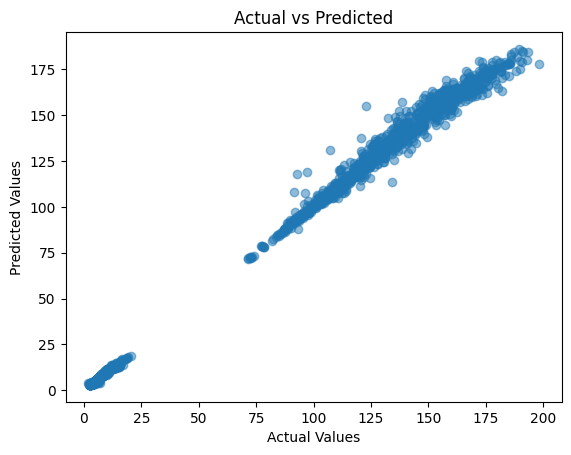

In [ ]:
#multiple values
predictions = model1.predict(X_test)
mse_m1 = mean_squared_error(y_test, predictions)
r2_m1 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)

print(mse_m1, r2_m1, maeval)

plt.scatter(y_test, predictions, alpha=0.5, cmap='viridis')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

In [11]:
predictions = model2.predict(X_test)
mse_m2 = mean_squared_error(y_test, predictions)
r2_m2 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)

print(mse_m2, r2_m2, maeval)


7.54846407286938 0.8951977949735154 1.2546440431067647


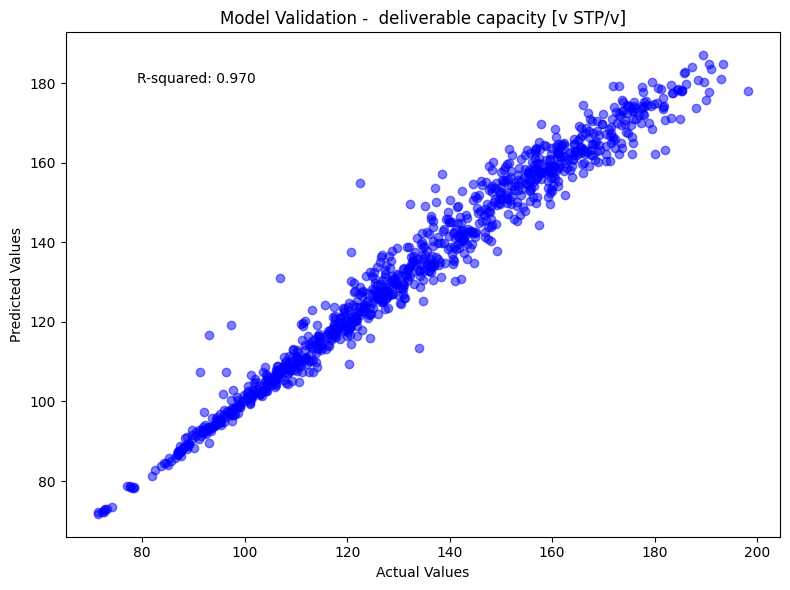

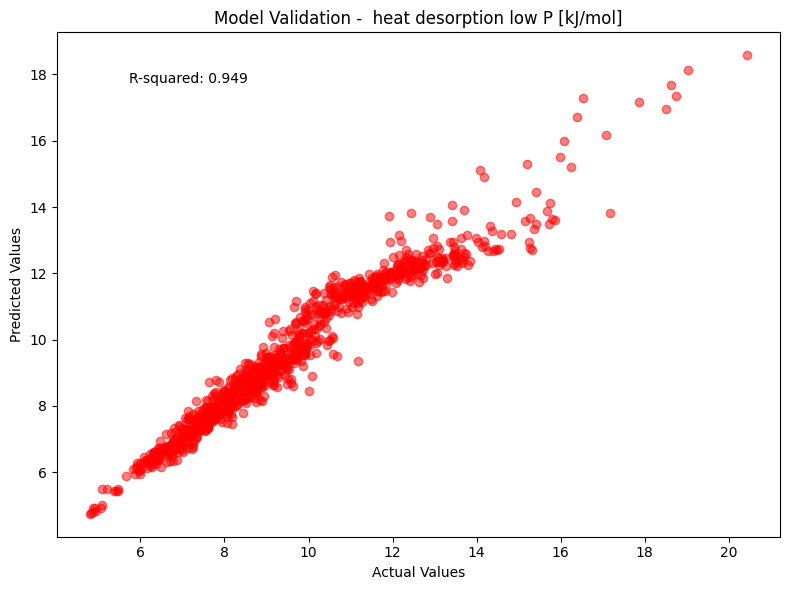

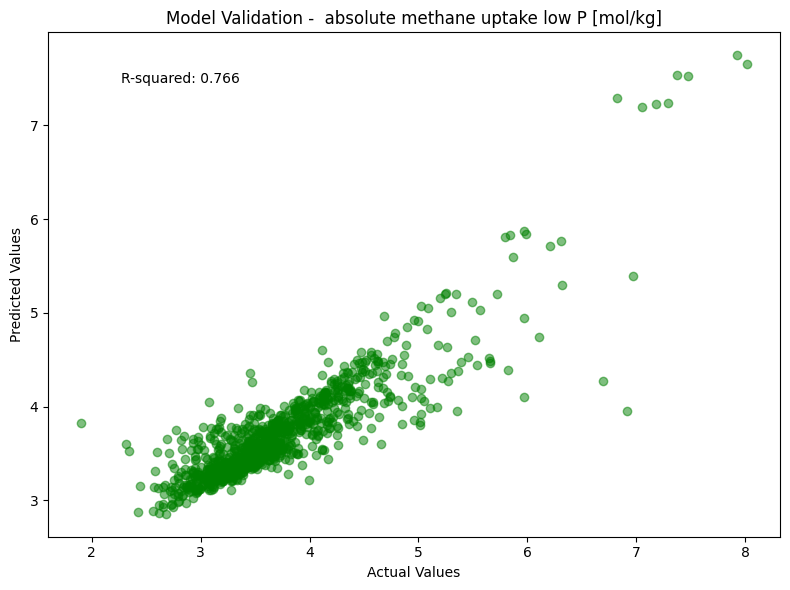

In [12]:
properties = [' deliverable capacity [v STP/v]', ' heat desorption low P [kJ/mol]', ' absolute methane uptake low P [mol/kg]']
colors = ['blue', 'red', 'green']

for i, (property_name, color) in enumerate(zip(properties, colors)):
    # Extract actual and predicted values for the current property
    y_actual = y_test[property_name]
    y_predicted = predictions[:, i]

    # Calculate R-squared score for evaluation
    r2 = r2_score(y_actual, y_predicted)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5, color=color)
    plt.title(f'Model Validation - {property_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.text(0.1, 0.9, f'R-squared: {r2:.3f}', transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.show()

16.5284349107251 0.8393569064752743 1.8393778135867906


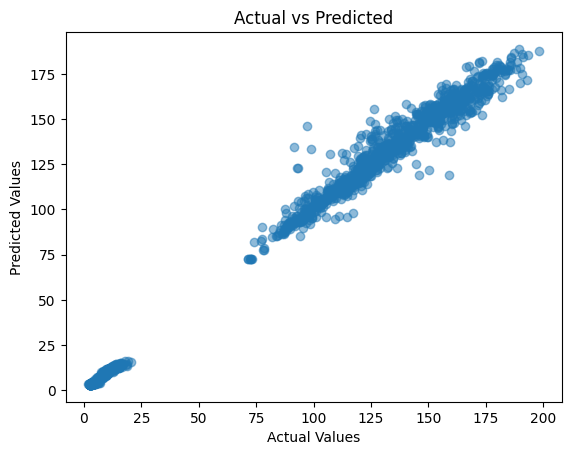

In [ ]:
predictions = model3.predict(X_test)
mse_m3 = mean_squared_error(y_test, predictions)
r2_m3 = r2_score(y_test, predictions)
maeval = mean_absolute_error(y_test, predictions)
print(mse_m3, r2_m3, maeval)

plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

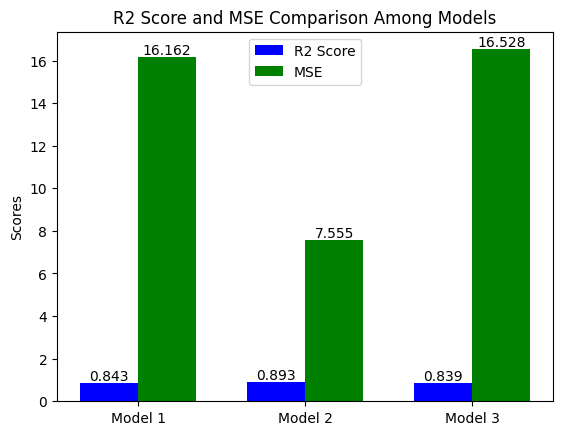

In [ ]:
r2_scores = [r2_m1, r2_m2, r2_m3]
mse_values = [mse_m1, mse_m2, mse_m3]

model_names = ['Model 1', 'Model 2', 'Model 3']

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(model_names))

# Plotting R2 scores
bars_r2 = ax.bar(index, r2_scores, bar_width, label='R2 Score', color='blue')

# Plotting MSE values
bars_mse = ax.bar(index + bar_width, mse_values, bar_width, label='MSE', color='green')

ax.set_ylabel('Scores')
ax.set_title('R2 Score and MSE Comparison Among Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()
# Adding labels and title
def autolabel(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

autolabel(bars_r2)
autolabel(bars_mse)

# Display the plot
plt.show()
